# Homework 5
                                                                                                Jordan Sullivan 
                                                                                                105 Spring 2018

In [347]:
%matplotlib inline
import numpy as np
import pandas as pd
import missingno as msno
from sklearn import preprocessing

a)

In [202]:
cassini = pd.DataFrame(pd.read_csv('data_Cassini.csv'))
venus = pd.DataFrame(pd.read_csv('data_Venus.csv'))

In [203]:
cassini.columns = ['JDTB','JDTBs','X','Y','Z','Vx','Vy','Vz','LT','RG','RR','NaN'] 
cassini.drop('NaN', axis=1, inplace=True)
cassini.drop('LT', axis=1, inplace=True)
cassini.drop('RG', axis=1, inplace=True)
cassini.drop('RR', axis=1, inplace=True)

In [339]:
cas1 = cassini['JDTBs']
for i, date in enumerate(cas1):
    #cas1[i]= date.replace('A.D. 1999-Jun-24 ','')
    #cas1[i]= date.replace(':00.0000','')
    hr, minute = date.split(":", 1)
    hr = int(hr)-18
    minute = int(minute)/60
    cas1[i]= (hr + minute)


AttributeError: 'float' object has no attribute 'split'

In [207]:
cassini['JDTBs'] = cas1

Text(0,0.5,'velocity [AU/day]')

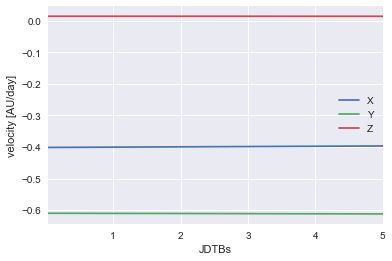

In [209]:
Cplt = cassini.plot('JDTBs',['X','Y','Z'])
Cplt.set_ylabel("velocity [AU/day]")

In [180]:
venus.columns = ['JDTB','JDTBs','X','Y','Z','Vx','Vy','Vz','LT','RG','RR','NaN'] 
venus.drop('NaN', axis=1, inplace=True)

In [338]:
ven1 = venus['JDTBs']
for i, date in enumerate(ven1):
    #ven1[i]= date.replace('A.D. 1999-Jun-24 ','')
    #ven1[i]= date.replace(':00.0000','')
    hr, minute = date.split(":", 1)
    hr = int(hr)-18
    minute = int(minute)/60
    ven1[i]= (hr + minute)


AttributeError: 'float' object has no attribute 'split'

In [337]:
venus['JDTBs'] = ven1

Text(0,0.5,'velocity [AU/day]')

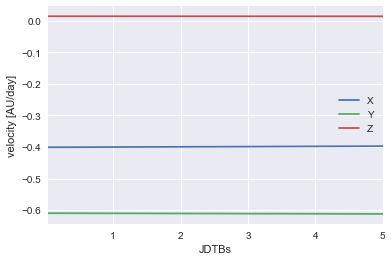

In [198]:
Vplt = venus.plot('JDTBs',['X','Y','Z'])

Vplt.set_ylabel("velocity [AU/day]")
#Vplt.set_xlabel("hours since June 24 1999")

Text(0,0.5,'velocity [AU/day]')

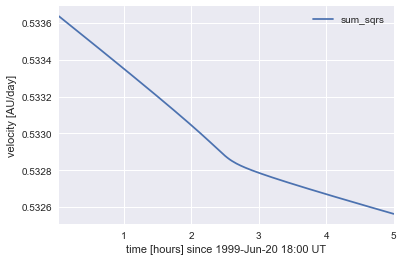

In [225]:
sum_sqrs = np.square(cassini['X']) + np.square(cassini['Y'])+ np.square(cassini['Z'])
cassini['sum_sqrs'] = pd.Series(sum_sqrs, index=cassini.index)
vsq_plt = cassini.plot('JDTBs','sum_sqrs') 

vsq_plt.set_xlabel('time [hours] since 1999-Jun-20 18:00 UT')
vsq_plt.set_ylabel("velocity [AU/day]")


b)

In [315]:
rx = venus['X'] - cassini['X']
ry = venus['Y'] - cassini['Y']
rz = venus['Z'] - cassini['Z']
r = np.array([rx, ry, rz])
mag_r = np.square(rx) + np.square(ry)+ np.square(rz)

cassini['rx'] = pd.Series(rx, index=cassini.index)
cassini['ry'] = pd.Series(ry, index=cassini.index)
cassini['rz'] = pd.Series(rz, index=cassini.index)
cassini['mag_r'] = pd.Series(mag_r, index=cassini.index)


Text(0,0.5,'velocity [AU/day]')

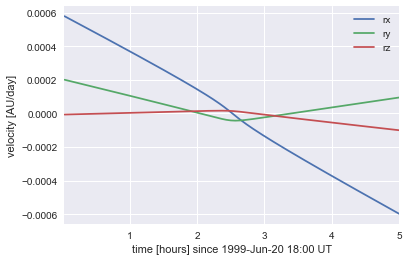

In [316]:
ccplt = cassini.plot('JDTBs',['rx','ry','rz'])
ccplt.set_xlabel('time [hours] since 1999-Jun-20 18:00 UT')
ccplt.set_ylabel("velocity [AU/day]")


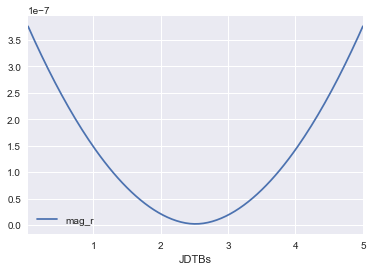

In [317]:
cassini.plot('JDTBs','mag_r')

In [318]:
for i, elem in enumerate(mag_r): #Finding index of min element of r
    if elem == min(mag_r):
        print(i)

74


In [313]:
r = np.array([rx, ry, rz])
r = np.transpose(r)
r[74]

c)

In [336]:
vx = venus['Vx'] - cassini['Vx']
vy = venus['Vy'] - cassini['Vy']
vz = venus['Vz'] - cassini['Vz']
v = np.array([vx, vy, vz])
mag_v = np.square(vx) + np.square(vy)+ np.square(vz)

cassini['vx'] = pd.Series(vx, index=cassini.index)
cassini['vy'] = pd.Series(vy, index=cassini.index)
cassini['vz'] = pd.Series(vz, index=cassini.index)



In [332]:
L = mag_r*mag_v
cassini['L'] = pd.Series(L, index=cassini.index)


d)

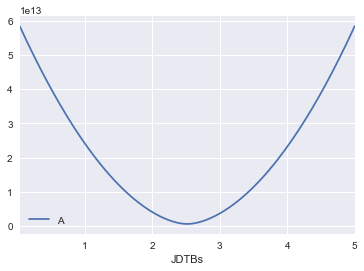

In [342]:
A = 4.867e24*L
cassini['A'] = pd.Series(A, index=cassini.index)
Aplot = cassini.plot('JDTBs','A')
Aplot.set_xlabel('time [hours] since 1999-Jun-20 18:00 UT')
Aplot.set_ylabel("A [pxL - mkr]")

Text(0,0.5,'angular momentum [vxp]')

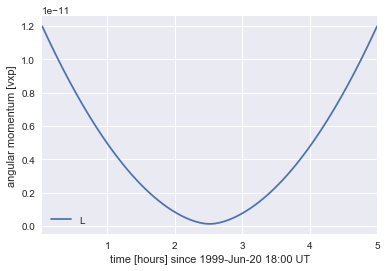

In [335]:
c2 = cassini.plot('JDTBs','L')
c2.set_xlabel('time [hours] since 1999-Jun-20 18:00 UT')
c2.set_ylabel("angular momentum [vxp]")

In [ ]:
d)

In [344]:
A_norm = (A - A.mean()) / (A.max() - A.min())
A_norm


0      0.640914
1      0.616294
2      0.591968
3      0.567938
4      0.544202
5      0.520762
6      0.497618
7      0.474769
8      0.452215
9      0.429958
10     0.407997
11     0.386331
12     0.364963
13     0.343891
14     0.323116
15     0.302638
16     0.282457
17     0.262573
18     0.242987
19     0.223699
20     0.204710
21     0.186018
22     0.167626
23     0.149532
24     0.131737
25     0.114242
26     0.097047
27     0.080151
28     0.063556
29     0.047262
         ...   
120    0.047509
121    0.063808
122    0.080407
123    0.097307
124    0.114507
125    0.132006
126    0.149805
127    0.167903
128    0.186300
129    0.204996
130    0.223990
131    0.243282
132    0.262872
133    0.282760
134    0.302945
135    0.323427
136    0.344206
137    0.365282
138    0.386655
139    0.408324
140    0.430289
141    0.452551
142    0.475108
143    0.497961
144    0.521109
145    0.544553
146    0.568292
147    0.592327
148    0.616656
149    0.641280
Length: 150, dtype: floa